In [17]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.pyplot import *
%matplotlib inline
 
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png','pdf')

In [18]:
agg_data = pd.read_csv('aggregated.csv')
agg_no_test = agg_data[agg_data['_golden'] == False]
full_data = pd.read_csv('full_report.csv')

### Confidence

#### With Test Questions

In [19]:
agg_data[['assigned_class:confidence']].describe()

,assigned_class:confidence
count,251.00000
mean,0.86168
std,0.17678
min,0.35540
25%,0.67485
50%,1.00000
75%,1.00000
max,1.00000


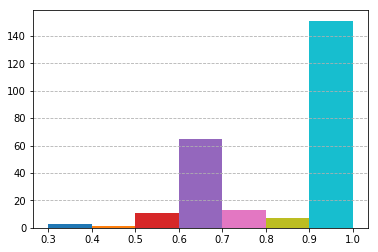

In [20]:
color_map = plt.cm.get_cmap('tab10')
#plt.title('Confidence of Labeling')
plt.grid(axis='y', linestyle='dashed')
ticks = [0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]
plt.xticks(ticks)
n, bins, patches = plt.hist(
    agg_data['assigned_class:confidence'], bins=ticks, color='green')
bin_centers = 0.5 * (bins[:-1] + bins[1:])

# scale values to interval [0,1]
col = bin_centers - min(bin_centers)
col /= max(col)

for c, p in zip(col, patches):
    plt.setp(p, 'facecolor', color_map(c))
plt.show()

#### Without Test Questions

In [21]:
agg_no_test[['assigned_class:confidence']].describe()

,assigned_class:confidence
count,200.000000
mean,0.868112
std,0.177531
min,0.355400
25%,0.676650
50%,1.000000
75%,1.000000
max,1.000000


#### Least confident sentences

In [23]:
color_map = sns.light_palette('blue', as_cmap=True)
pd.set_option('display.max_colwidth', -1)
pd.set_option('display.expand_frame_repr', True)
print('Least confident sentences (confidence <= 0.6)')
lc = agg_data[['_unit_id', 'assigned_class:confidence', 'assigned_class']]
lc = lc.sort_values('assigned_class:confidence')
lc = (lc[lc['assigned_class:confidence'] <= 0.6])
lc

Least confident sentences (confidence <= 0.6)


,_unit_id,assigned_class:confidence,assigned_class
168,1445637954,0.3554,WORSE
67,1445637841,0.3573,NO_COMP
149,1445637935,0.3700,BETTER
213,1446784090,0.4967,WORSE
174,1445637960,0.5001,UNCLEAR
54,1445637828,0.5024,UNCLEAR
162,1445637948,0.5042,NO_COMP
45,1445637819,0.5045,WORSE
219,1446786999,0.5058,UNCLEAR
226,1446789585,0.5212,WORSE


In [24]:
sentences = full_data[full_data['_unit_id'].isin(lc['_unit_id'].tolist())]
sentences_p = sentences[['_unit_id','assigned_class', '_trust', 'new_sentence']]
#sentences_p.style.background_gradient(cmap=color_map,subset=['_trust'])

In [25]:
merged = pd.merge(lc, sentences_p, on=['_unit_id'], how='inner', suffixes=['_l', '_r'])
merged.rename(columns={'assigned_class_l' : 'assigned', 'assigned_class_r':'proposed'}, inplace=True)
merged[['assigned_class:confidence', 'assigned', '_trust', 'proposed', 'new_sentence']].style.background_gradient(cmap=color_map,subset=['assigned_class:confidence'])

,assigned_class:confidence,assigned,_trust,proposed,new_sentence
0,0.3554,WORSE,0.7273,BETTER,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
1,0.3554,WORSE,0.8571,WORSE,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
2,0.3554,WORSE,0.8276,NO_COMP,Google shouldn't have mandated an inferior map app on the iphone:[OBJECT_A] (as opposed to android:[OBJECT_B]).
3,0.3573,NO_COMP,0.9091,NO_COMP,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
4,0.3573,NO_COMP,0.8571,BETTER,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
5,0.3573,NO_COMP,0.7778,UNCLEAR,"Sitting down with another programming language for a while can open your mind up to other ways of solving problems, and I think I became a better python:[OBJECT_A] programmer after spending time in ruby:[OBJECT_B] land."
6,0.37,BETTER,0.8276,NO_COMP,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
7,0.37,BETTER,1,BETTER,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
8,0.37,BETTER,0.875,UNCLEAR,Not to mention that the iphone:[OBJECT_A] and android:[OBJECT_B] phones deliver a far superior user experience overall.
9,0.4967,WORSE,0.8333,UNCLEAR,"Do yourself a favor, park (or better yet sell) the car:[OBJECT_A], ride a bicycle:[OBJECT_B] or take public transportation."


### Labels

#### Distribution

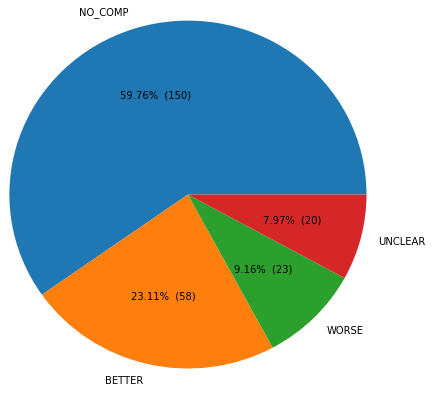

In [26]:
def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct


labels = agg_data['label']
plt.figure(figsize=plt.figaspect(1))
plt.pie(
    labels.value_counts().values,
    labels=labels.value_counts().keys().tolist(),
    radius=2,
    autopct=make_autopct(labels.value_counts().values))
plt.show()
